# Imports

In [1]:
from sklearn.metrics import classification_report
import panel as pn 

## Functions

In [2]:
from my_function import *
from plot_function import *

# Init Dataframe

In [3]:
# Set audio snippets and sample compression
offset_sec = 0.01
duration_sec = 0.05
sampl_fac = 1

# Create empty Dataframe
df_cols = ['dataset', 'audio_file_name', 'pitch', 'onset_sec', 'amplitude', 'frequency']
df_ref = pd.DataFrame(columns=df_cols)
df_test = pd.DataFrame(columns=df_cols)

# Create Dataframe with reference tones

In [4]:
%%time
# paths
path_main = "IDMT-SMT-GUITAR_V2/"
path_main_ref = path_main + "dataset1/Fender Strat Clean Neck SC/"
#path_main_ref = path_main + "dataset1/Fender Strat Clean Neck SC Chords/"

df_ref = read_xml_to_df(path_main_ref, df_cols, offset_sec, duration_sec, sampl_fac)
#df_ref.head(10)


CPU times: user 411 ms, sys: 79.3 ms, total: 490 ms
Wall time: 746 ms


# Create Dataframe with testdatas

In [5]:
%%time
# paths testdata

path_testdata = [
    path_main + 'dataset1/Fender Strat Clean Neck SC/',
    path_main + 'dataset1/Fender Strat Clean Neck SC Chords/',
    path_main + 'dataset1/Ibanez Power Strat Clean Bridge HU/',
    path_main + 'dataset1/Ibanez Power Strat Clean Bridge HU Chords/',
    path_main + 'dataset1/Ibanez Power Strat Clean Bridge+Neck SC/',
    path_main + 'dataset1/Ibanez Power Strat Clean Neck HU/',
    path_main + 'dataset2/']

for path in path_testdata:
    df_act = read_xml_to_df(path, df_cols, offset_sec, duration_sec, sampl_fac)
    df_test = df_test.append(df_act, ignore_index=True)
df_test

CPU times: user 9.53 s, sys: 1.41 s, total: 10.9 s
Wall time: 14.8 s


,dataset,audio_file_name,pitch,onset_sec,amplitude,frequency
0,dataset1/Fender Strat Clean Neck SC,G53-40100-1111-00001.wav,[40],0.2000,"[0.01021836468962585, 0.007419197032659204, 0....","[0.0, 20.02724795640327, 40.05449591280654, 60..."
1,dataset1/Fender Strat Clean Neck SC,G53-41101-1111-00002.wav,[41],0.2000,"[0.0005969542765022676, 0.0017092017487395916,...","[0.0, 20.02724795640327, 40.05449591280654, 60..."
2,dataset1/Fender Strat Clean Neck SC,G53-42102-1111-00003.wav,[42],0.2000,"[0.0034228128100198415, 0.00428068727065624, 0...","[0.0, 20.02724795640327, 40.05449591280654, 60..."
3,dataset1/Fender Strat Clean Neck SC,G53-43103-1111-00004.wav,[43],0.2000,"[0.0007040495234552155, 0.001659174406915279, ...","[0.0, 20.02724795640327, 40.05449591280654, 60..."
4,dataset1/Fender Strat Clean Neck SC,G53-44104-1111-00005.wav,[44],0.2000,"[0.0048971509176587305, 0.006496422462073519, ...","[0.0, 20.02724795640327, 40.05449591280654, 60..."
...,...,...,...,...,...,...
4448,dataset2,LP_V_vibrato_slow-fast.wav,[60],43.0498,"[0.002487341671033241, 0.004921049887680139, 0...","[0.0, 20.02724795640327, 40.05449591280654, 60..."
4449,dataset2,LP_V_vibrato_slow-fast.wav,[64],49.6065,"[0.0050438371645350035, 0.0022661671921127076,...","[0.0, 20.02724795640327, 40.05449591280654, 60..."
4450,dataset2,LP_V_vibrato_slow-fast.wav,[64],55.5450,"[0.0024214063371930804, 0.002211863439550683, ...","[0.0, 20.02724795640327, 40.05449591280654, 60..."
4451,dataset2,LP_V_vibrato_slow-fast.wav,[69],62.3891,"[0.0031924125558935325, 0.002750274986731963, ...","[0.0, 20.02724795640327, 40.05449591280654, 60..."


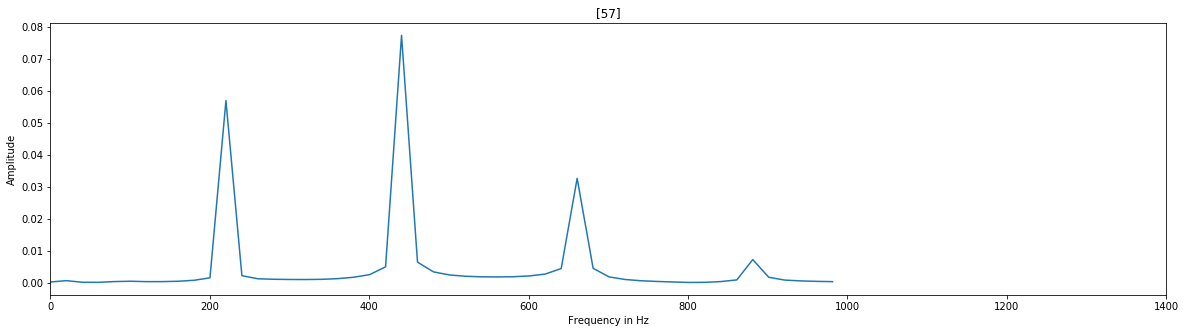

50

In [6]:
pitch = 36
plot_freq_domain(df_test.frequency[pitch], df_test.amplitude[pitch], df_test.pitch[pitch])
len(df_test.amplitude[pitch])

In [7]:
# drop duplicate in df_ref
df_ref_unique = pd.DataFrame(columns=df_cols)
 
for index, row in df_ref.iterrows():
    if not df_ref_unique.pitch.str.contains(row.pitch[0], regex=False).any():
        df_ref_unique = df_ref_unique.append(row, ignore_index=True)
df_ref_unique.head()

,dataset,audio_file_name,pitch,onset_sec,amplitude,frequency
0,dataset1/Fender Strat Clean Neck SC,G53-40100-1111-00001.wav,[40],0.2,"[0.01021836468962585, 0.007419197032659204, 0....","[0.0, 20.02724795640327, 40.05449591280654, 60..."
1,dataset1/Fender Strat Clean Neck SC,G53-41101-1111-00002.wav,[41],0.2,"[0.0005969542765022676, 0.0017092017487395916,...","[0.0, 20.02724795640327, 40.05449591280654, 60..."
2,dataset1/Fender Strat Clean Neck SC,G53-42102-1111-00003.wav,[42],0.2,"[0.0034228128100198415, 0.00428068727065624, 0...","[0.0, 20.02724795640327, 40.05449591280654, 60..."
3,dataset1/Fender Strat Clean Neck SC,G53-43103-1111-00004.wav,[43],0.2,"[0.0007040495234552155, 0.001659174406915279, ...","[0.0, 20.02724795640327, 40.05449591280654, 60..."
4,dataset1/Fender Strat Clean Neck SC,G53-44104-1111-00005.wav,[44],0.2,"[0.0048971509176587305, 0.006496422462073519, ...","[0.0, 20.02724795640327, 40.05449591280654, 60..."


## Histogram of Pitches Distribution

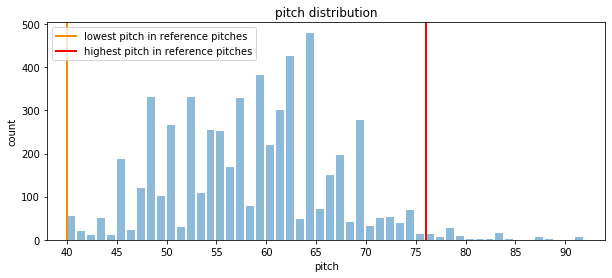

In [8]:
all_pitches_temp = df_test.pitch.tolist()
 
# flatten List
all_pitches = []
for sublist in all_pitches_temp:
    for item in sublist:
        all_pitches.append(item)

plot_hist(all_pitches, min(df_ref_unique.pitch), max(df_ref_unique.pitch),10, 4)

# Gurobi

In [9]:
# Build Model
m = Model('AMt')

lambs = []
for lamb in range(len(df_ref_unique)):
    lambs.append(m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_' + str(lamb)))
    #lambs.append(m.addVar(lb = 0, vtype = GRB.BINARY, name = 'lamb_' + str(lamb)))

m.update()

Academic license - for non-commercial use only


In [ ]:
%%time
pred_vec = []

len_lambs = len(lambs)
gamma = 2

amplitudes = df_test.amplitude.tolist()

for amplitude in amplitudes:

    mischsignal = amplitude
    len_mischsignal = len(mischsignal)

    cost_function = 0
    approxi_sgn = 0  
    penalty = 0
    #print(type(cost_function))
    #cost_function = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'CostFunction')
    #approxi_sgn = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'approxi_sgn')

    for lamb in range(len_lambs):
        la = lambs[lamb]
        note = df_ref_unique.amplitude[lamb]
        penalty += la * la
        

        for sgn in range(len_mischsignal):
            approxi_sgn = la * note[sgn]
            mi = mischsignal[sgn]
            
            deviation = mi - approxi_sgn
            
            cost_function += deviation * deviation
    
    #Constraints
    m.addConstrs((lambs[i] <= 1 for i in range(6)), name='c')

    #Params
    m.params.outputflag = 0 # Infotext ausblenden
    #m.params.presolve = 0
    
    m.setObjective(cost_function + gamma * penalty, GRB.MINIMIZE)
    m.optimize()


    approx_v = []

    for v in m.getVars():
        #print('%s: %g' % (v.varName, v.x))
        approx_v.append(v.x)

    pred_vec.append(approx_v)

# add pred_vec to df_test
df_test['pred_vec'] = pred_vec

# Calculate Pitch Score

In [ ]:
# Calc all target vectors
target_pitches = df_test.pitch.array
target_vec = []

for pitch in target_pitches:
    target_vec.append(calc_target_vec(pitch))

df_test['target_vec'] = target_vec
df_test.head()

In [ ]:
pitch_score = []

for vec in range(len(pred_vec)):
    pitch_score.append(metric(target_vec[vec], pred_vec[vec]))
    
df_test['pitch_score'] = pitch_score
df_test.head()

# Calculate F1 Score

In [ ]:
# normalize pred_vec
%time
norm_pred_vec = []

for j in range(len(df_test.pred_vec)):
    thresh_vec = []
    vec = norm_vec(df_test.pred_vec[j])
            
    norm_pred_vec.append(vec)

df_test['norm_pred_vec'] = norm_pred_vec

df_test.head()

In [ ]:
# get all max values from norm_pred_vec
max_val = []
for i in df_test.norm_pred_vec:
    max_val.append(np.amax(i))

In [ ]:
# thresholding vec_pred
%time
thresholded_vec = []
pitch_pred = []
threshold = max_val

for j in range(len(df_test.norm_pred_vec)):
    thresh_vec = []
    vec = df_test.norm_pred_vec[j]
    
    for i in range(len(vec)):
        if vec[i] >= threshold[j]:
            thresh_vec.append(1)
        else:
            thresh_vec.append(0)
            
    thresholded_vec.append(thresh_vec)
    pitch_pred.append(vec_to_pitch(thresh_vec))
    
df_test['thresholded_vec'] = thresholded_vec
df_test['pitch_pred'] = pitch_pred

df_test.head()

In [ ]:
#plot_bar(0, 10, 4)
plot_bar(df_test, 88, 10, 4, max_val[88])

In [ ]:
combi_target_vec = []
for i in df_test.target_vec:
    for elem in i:
        combi_target_vec.append(elem)

combi_pred_vec = []
for i in df_test.thresholded_vec:
    for elem in i:
        combi_pred_vec.append(elem)

# Save/Load Dataframe

In [ ]:
df_test.to_pickle('file_name')

In [ ]:
#df_test = pd.read_pickle('file_name')

# Scores

In [ ]:
# save length of pitches in a column
df_test['mono_poly'] = df_test.pitch.apply(lambda x: len(x))

# calculate the mean of the pitch score
pitch_score_mono = df_test.loc[df_test.mono_poly == 1].pitch_score.mean()
pitch_score_poly = df_test.loc[df_test.mono_poly > 1].pitch_score.mean()

# count monophonic and polyphonic files
mono_count = len(df_test.loc[df_test.mono_poly==1])
poly_count = len(df_test.loc[df_test.mono_poly>1])
total_count = mono_count + poly_count
anteil_mono = mono_count/total_count
anteil_poly = poly_count/total_count
total_pitch_score = pitch_score_mono*anteil_mono  + pitch_score_poly*anteil_poly

print('Possible number of Pichtes', df_test.mono_poly.unique())

print('Anzahl Monos: ', mono_count)
print('Anzahl Polys: ', poly_count)
print('Anzahl Files: ', total_count)

print('Pitch Score Mono: ', round(pitch_score_mono, 2))
print('Pitch Score Poly: ', round(pitch_score_poly, 2))

print('Total Pitch Score: ', round(total_pitch_score, 3))


In [ ]:
df_test.loc[df_test.mono_poly == 1].pitch_score.mean()

In [ ]:
print(classification_report(combi_target_vec, combi_pred_vec))

# Boxplots

In [ ]:
mono_score = df_test.loc[df_test.mono_poly == 1].pitch_score
poly_score = df_test.loc[df_test.mono_poly > 1].pitch_score

In [ ]:
plot_box(mono_score, poly_score, 4, 4)

# Scatterplot

In [ ]:
# New 24.12.2019
df_mono = df_test.loc[df_test.mono_poly == 1]
mono_pitches = df_mono.pitch
mono_pitches

In [ ]:
print('Pitch should be:', df_mono.pitch[1])
vec = df_mono.thresholded_vec[1]
print('Vec_pred:')
print(vec)
print('Pitch pred:', vec_to_pitch(vec))

In [ ]:
mono_pitches = []
mono_pitches_pred = []
df_mono = df_test.loc[df_test.mono_poly == 1]
 
for index, row in df_mono.iterrows():
    len_pitch_pred = len(row.pitch_pred) 
    #print('Pitch: {}, Länge: {}'.format(row.pitch, len_pitch_pred))
   
    for item in row.pitch:
        for i in range(len_pitch_pred):
            mono_pitches.append(item)
            i += 1
    for item in row.pitch_pred:
        mono_pitches_pred.append(item)

In [ ]:
# test values
pitch_pred = [0, 41, 43, 51, 67, 44, 67]
pitch = [40, 41, 43, 51, 67, 44, 62 ]

plot_scatter(mono_pitches_pred, mono_pitches, 4, 4)

In [ ]:
# NEW 28.12.2019
# Create Text with used Dataset
used_datasets = df_test.dataset.unique()
dataset_text = ('<h4> Verwendete Datensätze:</h4>'
                '<p style="font-size:10px">')
   
for i, text in enumerate(used_datasets):
    dataset_text += text
    if i < len(used_datasets)-1:
        dataset_text += '<br>'
    else:
        dataset_text += '</p>'

In [ ]:
# New 28.12.2019
report = classification_report(combi_target_vec, combi_pred_vec, output_dict=True)
zero = '0'
one = '1'
macro = 'macro avg'
weight = 'weighted avg'
 
f1_table = (
'<table style="font-size: 10px">'
  '<tr>'
    '<th></th>'
    '<th>Precision</th>'
    '<th>Recall</th>'
    '<th>F1-Score</th>'
  '</tr>'
  '<tr>'
    '<td>' + zero +'</td>'
    '<td>' + str(round(report[zero]['precision'], 2)) + '</td>'
    '<td>' + str(round(report[zero]['recall'], 2)) + '</td>'
    '<td>' + str(round(report[zero]['f1-score'], 2)) + '</td>'
  '</tr>'
  '<tr>'
    '<td>' + one +'</td>'
    '<td>' + str(round(report[one]['precision'], 2)) + '</td>'
    '<td>' + str(round(report[one]['recall'], 2)) + '</td>'
    '<td>' + str(round(report[one]['f1-score'], 2)) + '</td>'
  '</tr>'
  '<tr>'
    '<td>accuracy</td>'
    '<td>''</td>'
    '<td>''</td>'
    '<td>' + str(round(report['accuracy'], 2)) + '</td>'
  '</tr>'
  '<tr>'
    '<td>' + macro +'</td>'
    '<td>' + str(round(report[macro]['precision'], 2)) + '</td>'
    '<td>' + str(round(report[macro]['recall'], 2)) + '</td>'
    '<td>' + str(round(report[macro]['f1-score'], 2)) + '</td>'
  '</tr>'
  '<tr>'
    '<td>' + weight +'</td>'
    '<td>' + str(round(report[weight]['precision'], 2)) + '</td>'
    '<td>' + str(round(report[weight]['recall'], 2)) + '</td>'
    '<td>' + str(round(report[weight]['f1-score'], 2)) + '</td>'
  '</tr>'
'</table> '
)

In [ ]:
info_dataset = (
'<table style="font-size: 10px">'
  '<tr>'
    '<th>Datensatz Infos</th>'
    '<th></th>'
  '</tr>'
  '<tr>'
    '<td>Anzahl Monos</td>'
    '<td>' + str(mono_count) + '</td>'
  '</tr>'
  '<tr>'
    '<td>Anzahl Polys</td>'
    '<td>' + str(poly_count) + '</td>'
  '</tr>'
'</table> '
)

In [ ]:
title = '<div style="font-size:35px">Dashboard</div>'
pn.extension()

In [ ]:
dashboard = pn.Column(pn.Row(title),
                      pn.Row(plot_hist(all_pitches, min(df_ref_unique.pitch), max(df_ref_unique.pitch),10, 4),
                             dataset_text,
                             info_dataset,
                            ),
                      pn.Row(pn.Column(plot_bar(df_test, 152, 10, 3, max_val[152]), 
                                       plot_bar(df_test, 88, 10, 3, max_val[88])),
                             pn.Column(plot_scatter(mono_pitches_pred, mono_pitches, 6, 6)),
                             pn.Column(plot_box(mono_score, poly_score, 4, 4), f1_table),
                            ),
                     )
 
dashboard.show()
#dashboard.servable()

In [ ]:
goal = np.array([1, 0, 0, 0, 1])
bla = np.array([0, 0, 0, 0, 0])
#blabla = goal - bla
#blabla
metric(goal, bla)